In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import nltk

In [2]:
df=pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
print(df.shape)
df=df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


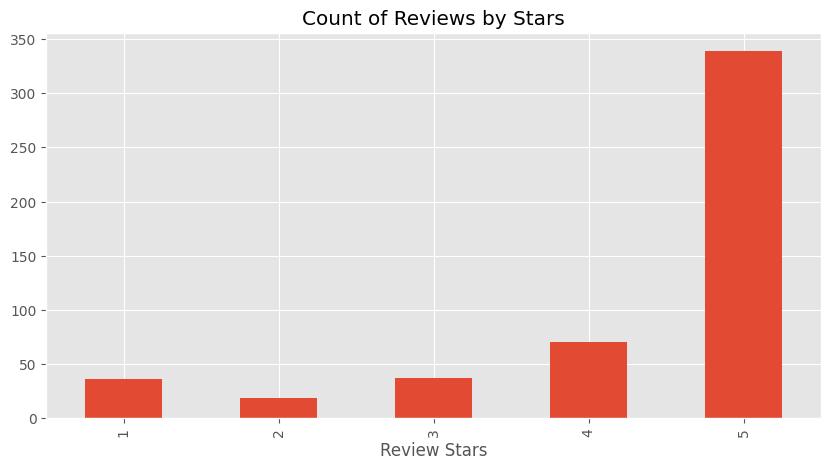

In [5]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Stars',figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [6]:
#basic nltk
example = df['Text'][45]
print(example)
nltk.word_tokenize(example)
tokens = nltk.word_tokenize(example)
tokens[:10]



This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't buy it again.


['This',
 'seems',
 'a',
 'little',
 'more',
 'wholesome',
 'than',
 'some',
 'of',
 'the']

In [7]:
x=nltk.pos_tag(tokens)

x

[('This', 'DT'),
 ('seems', 'VBZ'),
 ('a', 'DT'),
 ('little', 'RB'),
 ('more', 'RBR'),
 ('wholesome', 'JJ'),
 ('than', 'IN'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('supermarket', 'NN'),
 ('brands', 'NNS'),
 (',', ','),
 ('but', 'CC'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('somewhat', 'RB'),
 ('mushy', 'JJ'),
 ('and', 'CC'),
 ('does', 'VBZ'),
 ("n't", 'RB'),
 ('have', 'VB'),
 ('quite', 'RB'),
 ('as', 'RB'),
 ('much', 'JJ'),
 ('flavor', 'NN'),
 ('either', 'RB'),
 ('.', '.'),
 ('It', 'PRP'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('pass', 'VB'),
 ('muster', 'NN'),
 ('with', 'IN'),
 ('my', 'PRP$'),
 ('kids', 'NNS'),
 (',', ','),
 ('so', 'IN'),
 ('I', 'PRP'),
 ('probably', 'RB'),
 ('wo', 'MD'),
 ("n't", 'RB'),
 ('buy', 'VB'),
 ('it', 'PRP'),
 ('again', 'RB'),
 ('.', '.')]

In [15]:
entities= nltk.chunk.ne_chunk(x)
entities.pprint() ## pprint is useed to print data strucutres in  a pretty way


(S
  This/DT
  seems/VBZ
  a/DT
  little/RB
  more/RBR
  wholesome/JJ
  than/IN
  some/DT
  of/IN
  the/DT
  supermarket/NN
  brands/NNS
  ,/,
  but/CC
  it/PRP
  is/VBZ
  somewhat/RB
  mushy/JJ
  and/CC
  does/VBZ
  n't/RB
  have/VB
  quite/RB
  as/RB
  much/JJ
  flavor/NN
  either/RB
  ./.
  It/PRP
  did/VBD
  n't/RB
  pass/VB
  muster/NN
  with/IN
  my/PRP$
  kids/NNS
  ,/,
  so/IN
  I/PRP
  probably/RB
  wo/MD
  n't/RB
  buy/VB
  it/PRP
  again/RB
  ./.)


In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

s= SentimentIntensityAnalyzer()

In [17]:
s.polarity_scores('I am sad')

{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

In [18]:
s.polarity_scores('I am blind')

{'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compound': -0.4019}

In [19]:
s.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [20]:
res= {}
for i, row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    myid=row['Id']
    res[myid]=s.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [21]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.079,0.853,0.068,-0.1027
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.791,0.150,0.8215
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [22]:
vaders= pd.DataFrame(res).T
vaders= vaders.reset_index().rename(columns={'index':'Id'})
vaders= vaders.merge(df,how='left')
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.791,0.150,0.8215,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [23]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


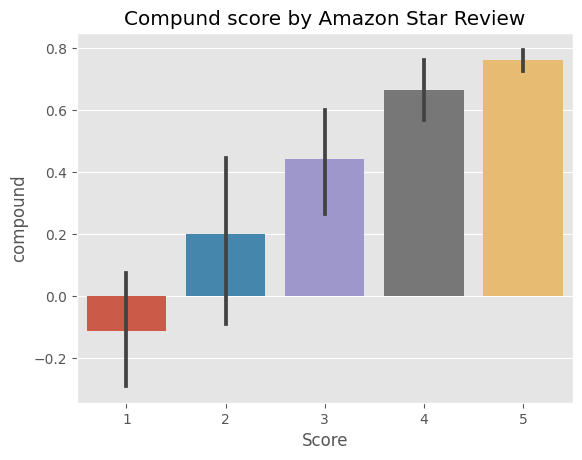

In [24]:
ax= sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund score by Amazon Star Review')
plt.show()

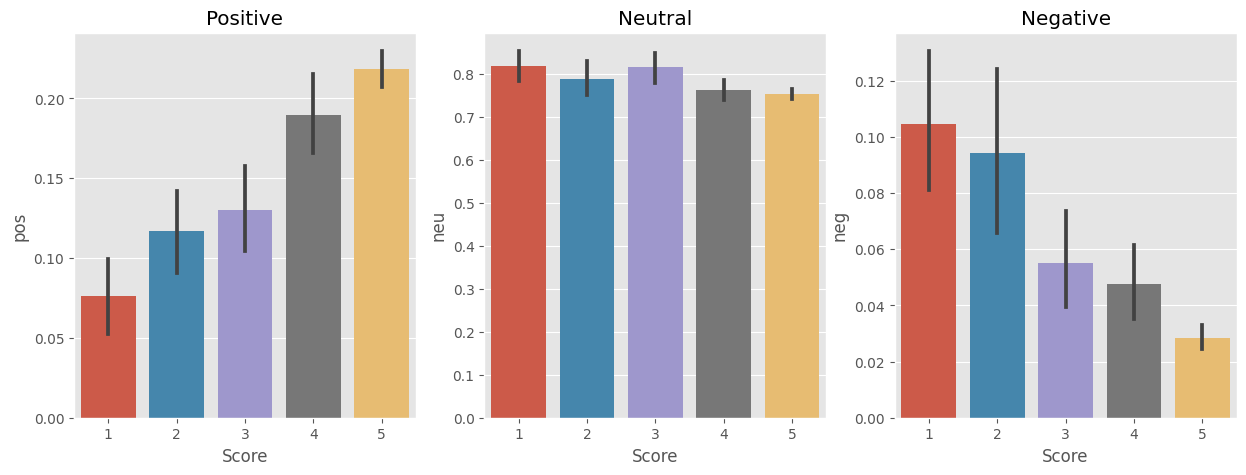

In [25]:
fig,axs =plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data=vaders, x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders, x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders, x='Score',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

In [26]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [27]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

In [29]:
def preprocess(text):
    new_text = []
 
 
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)
 

In [32]:
print(example)
s.polarity_scores(example
                 )

This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't buy it again.


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}